shape of xTrain (138, 60)
shape of xTest (70, 60)
shape of yTrain (138,)
shape of yTest (70,)
Some values predicted by model [-0.10240253  0.42090698  0.38593034  0.36094537  0.31520494] [ 1.11094176  1.12242751  0.77626699  1.02016858  0.66338081]
tp = 68.0	fn = 6.0
fp = 7.0	tn = 57.0

tp = 28.0	fn = 9.0
fp = 9.0	tn = 24.0

AUC for in-sample ROC curve: 0.979519


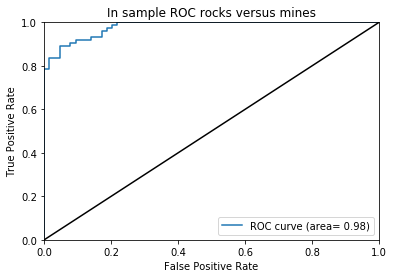

AUC for in-sample ROC curve: 0.848485


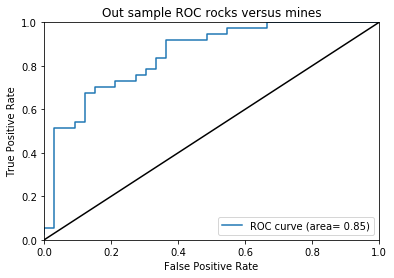

In [22]:
from urllib.request import urlopen
import numpy as np
import random
import pylab as pl
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc

def confusionMatrix(predicted,actual,threshold):
    if len(predicted) != len(actual): return -1
    tp =0.0; fp =0.0; tn =0.0; fn =0.0
    for i in range(len(actual)):
        if actual[i] > 0.5:
            if predicted[i] > threshold:
                tp += 1.0
            else: 
                fn += 1.0
        else:
            if predicted[i] < threshold:
                tn += 1.0
            else:
                fp += 1.0
    rtn = [tp,fn,fp,tn]
    return rtn

target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
             )
data = urlopen(target_url)

# divide the data into features and labels
xList = []
labels = []
for line in data:
    line = line.decode('utf-8')
    row=line.strip().split(",")
    #print(line)
    #xList.append(row)
    if row[-1] == 'M':
        labels.append(1.0)
    else:
        labels.append(0.0)
    row.pop()
    floatrow = [float(num) for num in row]
    xList.append(floatrow)
#print(xList)

# divide the dataset into trainning and testing
indices = range(len(xList))
xListTest = [xList[i] for i in indices if i%3 == 0]
xListTrain = [xList[i] for i in indices if i%3 != 0]
labelsTest = [labels[i] for i in indices if i%3 == 0]
labelsTrain = [labels[i] for i in indices if i%3 != 0]

xTrain = np.array(xListTrain)
xTest = np.array(xListTest)
yTrain = np.array(labelsTrain)
yTest = np.array(labelsTest)

print("shape of xTrain",xTrain.shape)
print("shape of xTest",xTest.shape)
print("shape of yTrain",yTrain.shape)
print("shape of yTest",yTest.shape)
#print(yTest)

rocksVMines_Model = LinearRegression()
rocksVMines_Model.fit(xTrain,yTrain)
train_predictions = rocksVMines_Model.predict(xTrain)
print("Some values predicted by model", train_predictions[0:5],train_predictions[-6:-1])

# create confusion matrix
confusionMatTrain = confusionMatrix(train_predictions,yTrain,0.5)
tp = confusionMatTrain[0]
fn = confusionMatTrain[1]
fp = confusionMatTrain[2]
tn = confusionMatTrain[3]

print("tp = " +str(tp) +"\tfn = "+ str(fn) + "\n" +"fp = "+str(fp)+"\ttn = " +str(tn)+ "\n")

test_predictions = rocksVMines_Model.predict(xTest)
confusionMatTest = confusionMatrix(test_predictions,yTest,0.5)
tp = confusionMatTest[0]
fn = confusionMatTest[1]
fp = confusionMatTest[2]
tn = confusionMatTest[3]

print("tp = " +str(tp) +"\tfn = "+ str(fn) + "\n" +"fp = "+str(fp)+"\ttn = " +str(tn)+ "\n")

# generate roc
fpr,tpr,thresholds = roc_curve(yTrain,train_predictions)
roc_auc = auc(fpr,tpr)
print('AUC for in-sample ROC curve: %f' % roc_auc)

pl.clf()
pl.plot(fpr,tpr,label='ROC curve (area= %0.2f)' % roc_auc)
pl.plot([0,1],[0,1],'k-')
pl.xlim([0.0,1.0])
pl.ylim([0.0,1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC rocks versus mines')
pl.legend(loc = "lower right")
pl.show()

fpr,tpr,thresholds = roc_curve(yTest,test_predictions)
roc_auc = auc(fpr,tpr)
print('AUC for in-sample ROC curve: %f' % roc_auc)

pl.clf()
pl.plot(fpr,tpr,label='ROC curve (area= %0.2f)' % roc_auc)
pl.plot([0,1],[0,1],'k-')
pl.xlim([0.0,1.0])
pl.ylim([0.0,1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Out sample ROC rocks versus mines')
pl.legend(loc = "lower right")ol.
pl.show()

